In [16]:
import pandas as pd
import numpy as np

In [17]:
# 1、读取数据
path ="20220725-cha.csv"
testData = pd.read_csv(path)

In [18]:
# 2、划分数据集
from sklearn.model_selection import train_test_split

In [19]:
x = testData.iloc[:, 1:-1]
y = testData["level"]

In [20]:
# 2）划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

C:\Users\Koo-Hung CHA\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Koo-Hung CHA\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Koo-Hung CHA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge

In [24]:
# 4）预估器
estimator = Ridge(alpha=0.5, max_iter=10000)
estimator.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
# 5）得出模型
print("岭回归-权重系数为：\n", estimator.coef_)
print("岭回归-偏置为：\n", estimator.intercept_)

岭回归-权重系数为：
 [0.09963197 0.87886256]
岭回归-偏置为：
 1.1618497109826589


In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
# 6）模型评估
y_predict = estimator.predict(x_test)
print("预测值：\n", y_predict)
error = mean_squared_error(y_test, y_predict)
print("岭回归-均方误差为：\n", error)

预测值：
 [4.34343509 0.33938042 0.33000749 1.7296356  0.34702437 1.64514268
 0.42068836 1.64355019 1.64355019 0.31635758 0.33437546 0.42846881
 0.31635758 1.65360562 0.36790873 0.37559817 0.3426109  1.73900853
 0.31635758 0.39493554 1.64355019 1.64559768 0.31635758 2.0471324
 3.14869207 0.31635758 1.64355019 0.39830252 2.9707428  1.64355019
 1.64355019 0.43492976 1.64355019 0.32108955 0.31635758 0.31749508
 0.31635758 0.31635758 1.66252356 0.31890557 0.51000424 1.64355019
 2.03803246 1.64596167 1.71107172 0.31635758 0.34706987 1.64355019
 1.64432369 0.33137248 1.68076893 1.68904988 1.64409619 1.78004925
 1.67840295 1.64355019 1.64355019 4.41891907]
岭回归-均方误差为：
 1.4614824882136364


In [28]:
import joblib

In [29]:
joblib.dump(estimator, "my_ridge.pkl")

['my_ridge.pkl']

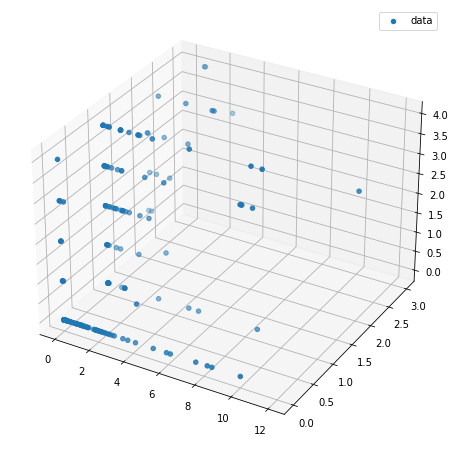

In [30]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.iloc[:, 0], x.iloc[:, 1], y[:],label='data')
plt.legend()

plt.savefig("11.pdf")
plt.show()